In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree

In [3]:
iris = pd.read_excel("Iris.xls")

In [4]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris.drop(['iris'], axis = 1)
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = iris [['iris']]
y.head()

,iris
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [7]:

from sklearn.model_selection import train_test_split

In [8]:
#chia du lieu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [9]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
clf = RandomForestClassifier(n_estimators = 100) #so cay trong rung
#lam voi: [30, 50, 70, 100, ..]=> chon rung phu hop theo so luong cay
#Thuc hien vong lap theo so cay trong rung lst_cay = [30, 50, 70, 100]: tao rung theo tung gia tri trong lst_cay
#do do chinh xac acc, neu do chinh xac = nhau ->so sanh train/test r^2
#chon model randomforest co do chinh xac cao nhat, chenh lenh giua diem r2 train/test it nhat 
#train model
model = clf.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

In [56]:
y_pred = clf.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score

In [19]:
print("Accurancy: ", accuracy_score(y_test, y_pred))

Accurancy:  0.9666666666666667


In [23]:
import numpy as np
X_new = np.array([[4.7, 3.2, 1.3, 0.2], [6.6, 3., 4.4, 1.4], [5.9, 3., 5.1, 1.8]])
y_hat_new = clf.predict(X_new)
y_hat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
imp_feature = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending= False)

In [26]:
imp_feature

petallength    0.449670
petalwidth     0.443838
sepallength    0.086895
sepalwidth     0.019598
dtype: float64

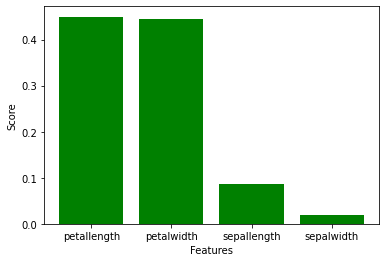

In [29]:
plt.bar(imp_feature.index, imp_feature, color='g')
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [51]:
#tao lop co 2 feature
X_2 = iris[['petallength', 'petalwidth']]
y_2 = y
X_2

,petallength,petalwidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)

In [45]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train_2, y_train_2)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [48]:
y_2_predict = model.predict(X_test_2)

In [50]:
print("Accurancy: ", accuracy_score(y_test_2, y_2_predict))

Accurancy:  0.9


In [53]:
X_2_new = [[4.3, 0.4]]
y_2_new = model.predict(X_2_new)
y_2_new

array(['Iris-setosa'], dtype=object)